# Portfolio Update #2: Data Cleaning and Visualization

In this "tidy data" project, I will be loading in a messy dataset on the 2008 Olympic medalists and doing some cleaning and basic exploratory data analysis (EDA) on it. To run all of the code for yourself, make sure to download the "TidyData-Project" folder from my data science portfolio on GitHub (https://github.com/t-clark04/Clark-Data-Science-Portfolio/tree/main). The Olympic medalist data will be contained within the "data" folder, and all other libraries and dependencies will be explained and loaded in along the way.

The data for this mini-project has been adapted from a dataset found at this link: https://edjnet.github.io/OlympicsGoNUTS/2008/. So, thank you to Giorgio Comai from the European Data Journalism Network for the use of his data, and thank you to all of you for checking out my project!

## Data Cleaning

First things first, we need to load in the .csv file as a ``pandas`` DataFrame and take a look at the first few rows of data to get of sense of what we're dealing with. While I import the ``pandas`` library into my Jupyter notebook, I am also going import the ``warnings`` library as well, since I will be using it to suppress some warning messages later in the notebook.

In [45]:
# Importing pandas so that we can create a pandas DataFrame from our .csv file
import pandas as pd

# Importing the warnings library to suppress some warning messages later on
import warnings

# Reading in the data using the read_csv() function in pandas and assigning
# the resulting dataframe to the variable df_messy
df_messy = pd.read_csv("data/olympics_08_medalists.csv")

# Using the .head() method to dispaly the first 10 rows of the DataFrame
df_messy.head(10)

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Acer Nethercott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Adam Korol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adam Kreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Adam Pine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Adam Wheeler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bronze


It looks like the first column of our dataset contains the name of each Olympic medalist at Beijing in 2008. The rest of the column labels are names of Olympic sports. Each cell contains a value indicating whether or not the given athlete earned an Olympic medal in that sport (specifying gold, silver, or bronze if ``True``, and ``NaN`` if ``False``).

Before we do any exploratory data analysis (EDA) on this dataset, we should first re-format it into a "tidy" data frame. A concept originally articulated by Hadley Wickham in his 2014 JSS article, a tidy data frame is one in which every variable has its own column, every observation forms a separate row, and every distinct type of observational unit has its own separate table (see https://www.jstatsoft.org/article/view/v059i10). Why do we care about doing this? Because "tidy data" has become the universal standard for proper data formatting, and it makes modeling, visualization, and analysis much simpler. Many of the tools we use for facilitating data analysis expect the data to be inputted in this format, and, when appropriate, output the data in the same way. It also means that we need a limited number of tools to transform messy data into the tidy data we want. Most of these tools for data shaping and transformation in Python can be found in the pandas Cheat Sheet linked here: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf. We'll be using a number of these methods, such as ``pd.melt`` and ``df.dropna()``, in our next few lines of code.

In his paper, Wickham lists out the five most common problems with messy datasets, the first of which is when "Column headers are values, not variable names" (again, see https://www.jstatsoft.org/article/view/v059i10). This is exactly the problem that we see right off the bat in our 2008 Summer Olympics dataset. The column headers are particular Olympic sport names, not variables. We, therefore, need to convert all of these sport names into one column called "Sport". What, then, will happen to the values that are currently contained within our DataFrame? Those, too, will need to be transformed. We'll add one more column called "Medal", for which all of the values will either be "gold", "silver", "bronze", or "NaN" (we'll fix the NaNs in a little bit).

So, the first thing we should do here is use the .melt() method (see the pandas Cheat Sheet) to pivot the DataFrame from "wide" to "long" format. We'll set medalist_name as our identifier variable (since the values constitute our individual observations), convert the rest of the column names to their own variable called "Sport", and assign the re-formatted values in our dataset to a variable called "Medal". Then, we'll take a look to see what we have after that.

In [46]:
# Using the .melt() method to convert our Olympic medal data from wide to long format
df_tidy = pd.melt(df_messy,
                  id_vars = "medalist_name", # Setting medalist_name as our identifier variable
                  value_vars = df_messy.columns[1:], # Converting the rest of the columns into values
                  var_name = "Sport", # Creating a new column called Sport to contain our new values
                  value_name = "Medal") # Creating another new column called Medal to contain our existing values

df_tidy

,medalist_name,Sport,Medal
0,Aaron Armstrong,male_archery,NaN
1,Aaron Peirsol,male_archery,NaN
2,Abdullo Tangriev,male_archery,NaN
3,Abeer Abdelrahman,male_archery,NaN
4,Abhinav,male_archery,NaN
...,...,...,...
131245,Éver Banega,male_greco-roman wrestling,NaN
131246,Ólafur Stefánsson,male_greco-roman wrestling,NaN
131247,Óscar Brayson,male_greco-roman wrestling,NaN
131248,Łukasz Pawłowski,male_greco-roman wrestling,NaN


That seems a little bit better, but we now notice that we're stuck with a bunch of NaN values in the medal column, and that our dataset now contains 131,250 rows! The reason for this is that we have every possible combination of athlete_name and sport in our dataset, even though each athlete only earned a medal in one sport! This violates the principles of tidy data because, as we stated before, every observation must form its own row. Here, the athlete names are our observations, and they are currently repeated across multiple rows, so, in this case, we need to drop all of the rows which give us no real information about the medalist (i.e. all rows in which the value for ``Medal`` is ``NaN``, since it means they didn't win an Olypmic medal in that sport).

So next, we'll drop all of the rows showing NaN in the ``Medal`` column, using the ``.dropna()`` method found in the pandas Cheat Sheet.

In [47]:
# Using the .dropna() method to drop every row with missing data.
df_tidy = df_tidy.dropna()

df_tidy

,medalist_name,Sport,Medal
177,Bair Badënov,male_archery,bronze
676,Ilario Di Buò,male_archery,silver
682,Im Dong-hyun,male_archery,gold
760,Jiang Lin,male_archery,bronze
920,Lee Chang-hwan,male_archery,gold
...,...,...,...
130932,Steeve Guénot,male_greco-roman wrestling,gold
131159,Yannick Szczepaniak,male_greco-roman wrestling,bronze
131162,Yavor Yanakiev,male_greco-roman wrestling,bronze
131200,Yury Patrikeyev,male_greco-roman wrestling,bronze


That's more like it! Now every observation (i.e. every athlete) in our dataset forms one row. But if we look closely, we notice that we can actually clean up this dataset even further. The second most common problem with messy datasets that Wickham points out in his article occurs when "Multiple variables are stored in one column." Currently, our ``Sport`` column values contain both the gender of the athlete, as well as the sport they play. Since all of the values follow the same general format (i.e. "gender_sport"), we can use use  ``str.split()``to separate out these two variables by splitting on the underscore, reassigning the resulting values into a column called ``Gender`` and a column called ``Sport``.

For whatever reason, carrying out this process sometimes raises a warning message, and so I have used the ``filterwarnings`` function to ignore that warning and prevent it from being displayed in the output.

In [48]:
# Suppress the occasional warning message from being displayed in the output
warnings.filterwarnings('ignore')
# Creating two new columns from the "Sport" column, splitting on an underscore
# as our delimiter and expanding these values into two separate columns
df_tidy[["Gender", "Sport"]] = df_tidy["Sport"].str.split(pat = "_", expand = True)

df_tidy

,medalist_name,Sport,Medal,Gender
177,Bair Badënov,archery,bronze,male
676,Ilario Di Buò,archery,silver,male
682,Im Dong-hyun,archery,gold,male
760,Jiang Lin,archery,bronze,male
920,Lee Chang-hwan,archery,gold,male
...,...,...,...,...
130932,Steeve Guénot,greco-roman wrestling,gold,male
131159,Yannick Szczepaniak,greco-roman wrestling,bronze,male
131162,Yavor Yanakiev,greco-roman wrestling,bronze,male
131200,Yury Patrikeyev,greco-roman wrestling,bronze,male


Look at that! Now, all of our observations (athletes) form their own row, and all of our variables (sport, medal, and gender) form their own columns. Furthermore, since we're only looking at one type of observational unit here, we don't have to worry about making separate tables for them. This means that we finally have tidy data on our hands! Hadley Wickham would be proud!

That being said, we can still do a couple more things to make our dataset a bit more aesthetically pleasing. For example, I notice that the index numbers are all messed up from when we originally melted the dataframe. Let's re-sort the values in our dataframe by ``medalist_name``using the ``.sort_values()`` method and then reset our indices with ``.reset_index()``. We can also rename the ``medalist_name`` column to ``Athlete``while we're at it with the ``.rename()`` method, just to maintain a similar naming convention across columns.

We'll do all of this with method chaining, which is when we use the result of the previous method call as the input into a subsequent method. It sounds complicated, but it's easy enough to understand once you see it in action!

In [49]:
# Using method chaining to make our DataFrame more aesthetically pleasing
df_tidy = (df_tidy.sort_values(by = "medalist_name") # Sort the columns of the data frame alphabetically by medalist_name
           .reset_index(drop = True) # Then reset the indices and drop the old ones
           .rename(columns =  # Finally, rename the medalist_name column to "Athlete" instead
                   {"medalist_name": "Athlete"})
)

df_tidy

,Athlete,Sport,Medal,Gender
0,Aaron Armstrong,athletics,gold,male
1,Aaron Peirsol,swimming,gold,male
2,Abdullo Tangriev,judo,silver,male
3,Abeer Abdelrahman,weightlifting,bronze,female
4,Abhinav,shooting sport,gold,male
...,...,...,...,...
1870,Éver Banega,association football,gold,male
1871,Ólafur Stefánsson,handball,silver,male
1872,Óscar Brayson,judo,bronze,male
1873,Łukasz Pawłowski,rowing,silver,male


Look at that! We now have a beautiful tidy dataframe, where each row represents one Olympic medalist and each column gives different attributes of that athlete, namely the sport they played, the medal they earned in the 2008 Summer Olympics in Beijing, and their gender.

But before we continue with our exploratory data analysis, it would be responsible of us to do a little bit more data validation to avoid any potential issues that could arise in the future. For example, we know that the dataset now contains no missing values, since we dropped those after melting the DataFrame. We also don't have to worry about outliers here, since all of our variables are in this dataset are categorical. However, we can check for duplicates to make sure all of our data entries are unique. We'll combine the ``.duplicated()`` and ``.sum()`` methods to add up the number of duplicated rows in the DataFrame. Let's see what we get.

In [50]:
# Adding up the number of duplicated rows in the dataset
df_tidy.duplicated().sum()

0

Since this code returns ``0``, we know that all of the observations in our tidy dataset are unique! Awesome!

Last but not least, we don't have to worry about any dates in our dataset, which are usually the biggest culprits of incorrect data types. However, we should still check that all of the values for our variables make sense. We'll use ``.unique()`` to see all of the unique values for each of our variables and make sure that the values are consistent and logical.

In [51]:
# Printing the unique values of the "Gender" variable
print(df_tidy["Gender"].unique())

# Printing the unique values of the "Medal" variable
print(df_tidy["Medal"].unique())

# Printing the unique values of the "Sport" variable
print(df_tidy["Sport"].unique())

# Printing the number of sports in the dataset
print(df_tidy["Sport"].unique().__len__())

['male' 'female']
['gold' 'silver' 'bronze']
['athletics' 'swimming' 'judo' 'weightlifting' 'shooting sport' 'rowing'
 'greco-roman wrestling' 'fencing' 'water polo' 'canoeing and kayaking'
 'baseball' 'freestyle wrestling' 'synchronized swimming' 'handball'
 'field hockey' 'volleyball' 'boxing' 'sailing' 'track cycling'
 'association football' 'artistic gymnastics' 'road bicycle racing'
 'diving' 'taekwondo' 'rhythmic gymnastics' 'tennis' 'softball'
 'equestrian sport' 'modern pentathlon' 'basketball' 'bmx' 'archery'
 'triathlon' 'badminton' 'table tennis' 'trampoline gymnastics'
 'beach volleyball' 'mountain biking']
38


Looking at our output, we can see that the gender column contains only two values -- "male" or "female", the medal column contains three values -- "gold", "silver", and "bronze", and the sport column contains 38 unique and valid sports. We're good to go! Time to explore and visualize our data!

## Visualization

Looking at our (now tidy) Olympic medal dataset, we see that our data contains three key informative variables -- ``Gender``, ``Medal``. and ``Sport``. Since our ``Athlete`` variable really only serves as our identifier variable here, we won't be able to do much of anything with it with regards to analysis and visualization. So, we'll just focus on these three in this next portion of the project.

``Gender``, ``Medal``, and ``Sport`` are all categorical variables, so in exploring the relationships between them, we will be limited to graphs like barplots and pie charts. 

With all that being said, what should we explore first? The first question that comes to my mind when looking at these three variables is "How many gold, silver, and bronze medals were won by males vs. females in the 2008 Summer Olympics?" So let's start with that. We can look at the breakdown of Olympic medals by gender in tabular form by using the ``pivot_table`` function in the ``pandas`` library!

In [52]:
# Using the pivot_table function within the pandas library
pd.pivot_table(df_tidy,
               index = "Medal", # Use the values of "Medal" as our row labels
               columns = "Gender", # Use the values of "Gender" as our column labels
               values = "Sport", 
               aggfunc = "count") # And count the values across sports to give us the total we want

Gender,female,male
Medal,,
bronze,294,374
gold,271,315
silver,278,343


Wow! Look at that! From this pivot table, we can deduce that in every category (i.e. gold. silver, and bronze), male athletes earned a greater number of medals than female athletes at the 2008 Summer Olympics. Interesting! Before we speculate about why this might be, let's visualize this insight in a side-by-side barplot, using the ``countplot`` function in the ``seaborn`` library! 

Why a side-by-side barplot, rather than a stacked barplot? Because in this case, we care more about the comparison of medals earned by men vs. women than about the "composition" of medals by gender. In other words, looking at a side-by-side barplot allows us to directly compare the numbers of medals earned by men and women in each medal category, whereas a stacked barplot would make it harder for us to do that, since we as humans are bad at detecting small differences in areas.

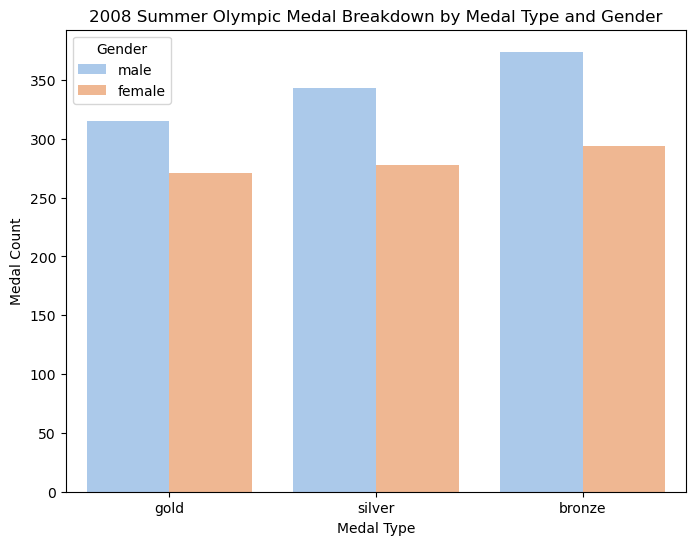

In [53]:
# Importing the seaborn library for making the bar chart
import seaborn as sns
# Importing matplotlib.pyplot to create our graphing "canvas"
import matplotlib.pyplot as plt

# Creating an 8 x 6 Canvas for our plot
plt.figure(figsize = (8,6))
# Generating our side-by-side bar chart, with "Medal" on the x-axis, "count" on the
# y-axis, "Gender" assigned to bar color, and color palette set to a nice pastel
sns.countplot(data = df_tidy, x = "Medal", hue = "Gender", palette = "pastel")

# Graph labels
plt.xlabel("Medal Type")
plt.ylabel("Medal Count")
plt.title("2008 Summer Olympic Medal Breakdown by Medal Type and Gender")

# Displaying the resulting plot
plt.show()

Now, we should think about why this might be. Surely, this isn't because of a difference in athletic ability. After all, how many Olympic sports do you know that pit men and women against each another, with only one gender taking home the medals? Not very many (if any!). Therefore, this difference is likely due to a larger number of male sports in the Summer Olympics, as well as a larger number of male events in sports played by both genders. Let's check it out and see if our hypothesis is correct!

First, we'll look at a pivot table comparing ``Gender`` to ``Sport``, again using the ``pivot_table`` function from the ``pandas`` library.

In [55]:
# Using the pivot_table function within the pandas library
sport_gender = pd.pivot_table(df_tidy,
               index = "Sport", # Use the values of "Sport" as our row labels
               columns = "Gender", # Use the values of "Gender" as our column labels
               values = "Medal", 
               aggfunc = "count") # And count the values across medal categories to give us the total we want

sport_gender

Gender,female,male
Sport,,
archery,9.0,11.0
artistic gymnastics,20.0,29.0
association football,54.0,55.0
athletics,81.0,85.0
badminton,10.0,12.0
baseball,NaN,72.0
basketball,36.0,35.0
beach volleyball,6.0,6.0
bmx,3.0,3.0


Because there are so many sports in our Summer Olympic dataset, this pivot table is hard to interpret. To test our hypothesis a little bit more clearly, let's count the number of male-only sports in the 2008 Olympics and compare it to the number of female-only sports. Let's also count the number of sports in which the number of medals awarded to men is greater than the number of medals awarded to women, and vice versa!

We'll use some of the subsetting features from the pandas Cheat Sheet to do this, such as the ``.isnull()`` and the ``.notnull`` methods!

In [72]:
# Find all sports in the DataFrame in which the value for female is NaN and the value
# for male is an actual value, then find the length of the subsetted dataset.
no_female = len(sport_gender[sport_gender['female'].isnull() & sport_gender['male'].notnull()])
print(f'Number of male-only sports: {no_female}')

# Same thing, but now looking for sports with NaN for male and a real value for female.
no_male = len(sport_gender[sport_gender['male'].isnull() & sport_gender['female'].notnull()])
print(f"Number of female-only sports: {no_male}")

# Find all sports for which the number of medals awarded to men is greater than
# the number of medals awarded to women, then count them up.
more_male = len(sport_gender[sport_gender['male'] > sport_gender['female']])
print(f"Number of sports with more male medals: {more_male}")

# Same thing, but just the opposite this time.
more_female = len(sport_gender[sport_gender['female'] > sport_gender['male']])
print(f"Number of sports with more female medals: {more_female}")


Number of male-only sports: 3
Number of female-only sports: 3
Number of sports with more male medals: 17
Number of sports with more female medals: 4


So, it looks like our hypothesis was only partly right! There were actually an *equal* number of male-only and female-only sports in the 2008 Summer Olympics in Beijing, so that shouldn't have been the main contributor to the discrepancy in medal count. What was more influential in this medal difference was the fact that there were 17 sports in which the number of medals awarded to male athletes was greater than the number of medals awarded to female athletes (whereas there were only 4 sports in which the opposite was true). This could be because these sports have more male events than female events, but it could also be due to men's teams being bigger than women's teams in some cases, as well as the long-term effects of some sports simply being male-dominated. Due to the limited information given in this dataset, we can't say for certain, but it's an interesting insight nonetheless.

Finally, the last exploration we can do with this dataset is looking at the relationship between ``Sport`` and ``Medal`` to see which Olympic sports award medals to the most athletes. We'll use the ``pivot_table`` function one last time to see the breakdown of medals by sport, so that we can see the data that we're working with before we visualize it afterwards. Again, since there are 38 unique sports in the dataset, this will be a long pivot table with a lot of information to take in, but we'll be using it more to validate the figure labels in our pie charts than anything else. Let's go!

In [73]:
# Using the pivot_table function one last time
pd.pivot_table(df_tidy,
               index = "Sport", # Use the values of "Sport" as our row labels
               columns = "Medal", # Use the values of "Medal" as our column labels
               values = "Gender", 
               aggfunc = "count") # And count the values across gender to give us the total we want

Medal,bronze,gold,silver
Sport,,,
archery,8,5,7
artistic gymnastics,19,14,16
association football,36,37,36
athletics,55,52,59
badminton,7,7,8
baseball,24,24,24
basketball,24,23,24
beach volleyball,4,4,4
bmx,2,2,2


By taking a quick look over the pivot table, we can see that athetics appears to award the most medals, followed by rowing and swimming. However, in general, this table is just too large for us to comprehend. Let's use some pie charts instead, to visualize this data and wrap our heads around it a bit better. We'll group all sports with less than 25 medals of a particular kind within the "Other" category to better distinguish the key insights. To do this, we will first use the ``.query`` method (see https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) to split our DataFrame into gold, silver, and bronze subsets. For each subset, we then use the ``.value_counts`` method from the ``pandas`` library to group the data by sport and count the number of medals observed in each subset. After that, we use the versatile ``apply`` function to modify our subsetted datasets, adding a new variable called ``Sport_Grouped`` which contains the original sport if the medal count in that sport is greater than or equal to 25 or "Other" if the sport has fewer than 25. Finally, we use the ``.value_counts`` method one more time to count up the medal counts for each sport and for the "Other" category. This is what we will use to make our pie charts.

In [75]:
# Suppress the warning message that tends to be raised when running this code.
warnings.filterwarnings('ignore')

# Using the query method to make subsets of our original DataFrame 
# according to the type of medal awarded.
df_gold = df_tidy.query('Medal == "gold"')
df_silver = df_tidy.query('Medal == "silver"')
df_bronze = df_tidy.query('Medal == "bronze"')

# For each of our subsets, count up the number of observations of each sport,
# then make a new column so that we can categorize all of the sports with less
# than 25 medals as "Other". Finally, count up the values one more time so that
# we can plot them in our pie charts.
gold_counts = df_gold["Sport"].value_counts()
df_gold["Sport_Grouped"] = df_gold['Sport'].apply(lambda x: x if gold_counts[x] >= 25 else "Other")
gold_counts = df_gold['Sport_Grouped'].value_counts()

silver_counts = df_silver["Sport"].value_counts()
df_silver["Sport_Grouped"] = df_silver['Sport'].apply(lambda x: x if silver_counts[x] >= 25 else "Other")
silver_counts = df_silver['Sport_Grouped'].value_counts()

bronze_counts = df_bronze["Sport"].value_counts()
df_bronze["Sport_Grouped"] = df_bronze['Sport'].apply(lambda x: x if bronze_counts[x] >= 25 else "Other")
bronze_counts = df_bronze['Sport_Grouped'].value_counts()


For example, our ``gold_counts`` DataFrame now looks like this:

In [78]:
gold_counts

Sport_Grouped
Other                   322
athletics                52
rowing                   48
swimming                 39
association football     37
field hockey             33
handball                 29
water polo               26
Name: count, dtype: int64

Finally, let's get to plotting! We ultimately want to make three separate pie charts, displaying the medal count by sport for each of gold, silver, and bronze, respectively.

We start out by setting our "canvas" with ``plt.figure``. Then, for each of our three subplots, we use the ``plt.pie`` function from ``matplotlib.pyplot`` to make our pie charts. We start out by feeding the function our wedge sizes, which are contained within our previously-created DataFrames. We then input our wedge labels, which are the indices of our DataFrames. we can also set the label distance and the starting angle of the pie chart to adjust the display of the labels and make sure they don't overlap too much. After that, we pass a dictionary into the ``wedgeprops`` argument to specify that we want the separating lines to be white and have a width of 1 (see https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Wedge.html#matplotlib.patches.Wedge). Then, we use the ``autopct`` parameter to display the counts for each sport on the graph, though displaying the whole number rather than the percentage is a bit tricky, which is why I ended up using a line of code from a Stack Overflow response for this (see https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed). Finally, we can change the color pallet to pastel to maintain theme consistency with our earlier bar chart. After adjusting the white space between graphs the graphs, let's see what we get!

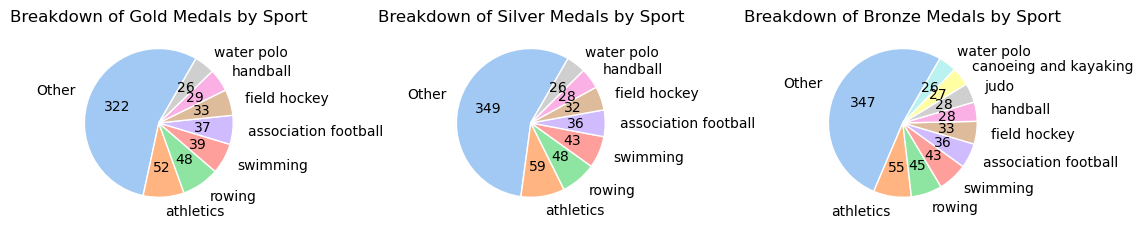

In [81]:
# Creating a 12 x 8 "canvas" for our subplots
plt.figure(figsize = (12,8))

# For each of our three subplots, use the plt.pie function to plot a pie chart displaying the breakdown
# of medals by sport. Use our previously-created DataFrames to input the wedge sizes, the indices of those
# DataFrames to specify the labels, and set the labeldistance and startangle to make sure that the labels
# are reasonably spaced. Use wedgeprops to set the width and color of the separating lines, then display
# the labels as whole numbers using the autopct parameter. Finally, use the pastel color palette from
# seaborn to make the graph more aesthetically pleasing and consistent with the first graph in the notebook.
plt.subplot(1,3,1)
plt.pie(gold_counts, labels = gold_counts.index, labeldistance = 1.2,  startangle = 60,
        wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}, autopct= lambda x: '{:.0f}'.format(x*gold_counts.sum()/100), 
        colors = sns.color_palette('pastel'))
plt.title("Breakdown of Gold Medals by Sport")

plt.subplot(1,3,2)
plt.pie(silver_counts, labels = silver_counts.index, labeldistance = 1.2, startangle = 60, 
        wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}, autopct= lambda x: '{:.0f}'.format(x*silver_counts.sum()/100), 
        colors = sns.color_palette('pastel'))
plt.title("Breakdown of Silver Medals by Sport")

plt.subplot(1,3,3)
plt.pie(bronze_counts, labels = bronze_counts.index, labeldistance = 1.2, startangle = 60,
        wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}, autopct= lambda x: '{:.0f}'.format(x*bronze_counts.sum()/100), 
        colors = sns.color_palette('pastel'))
plt.title("Breakdown of Bronze Medals by Sport")

# Separate the three subplots by 1 unit of white space.
plt.subplots_adjust(wspace=1)

# Display the pie charts we just made.
plt.show()

Voila! How cool is that! We can validate our pie charts by comparing some of the values to the ones in our pivot table from earlier, and we see that they match up perfectly. Looking at the three pie charts, we see that across medal category, athletes in athletics are awarded the most medals, followed by rowing, swimming, association football, field hockey, and handball. After that, we start to see some deviations. 

So why do we see that these sports are awarded the most medals? One of two reasons: either the sport has a very large number of events or it is played by a team with a large number of athletes. Athletics and swimming fit into the first category. A quick Google search tells me that there are 48 athletic events and 35 swimming events in the Summer Olympics. No wonder those athletes take home so many medals! Sports like association football and field hockey, on the other hand, are played with 11 players on the field, and many more sitting on the bench in reserve, so these athletes in these sports take home a large number of medals just because of how many players are needed on a team. For rowing, it's likely a combination of the two reasons, since there are 14 rowing events in the Summer Olympics, with as many as 9 athletes participating in a given event.